# Метод Нумерова для решения краевой задачи

### Матрица СЛАУ

В процессе численного решения формируется трёхдиагональная матрица СЛАУ:

$$
A =
\begin{pmatrix}
-2 + \alpha_1 & 1 + \beta_1 & 0 & 0 & \dots & 0 \\
1 + \beta_1 & -2 + \alpha_2 & 1 + \beta_2 & 0 & \dots & 0 \\
0 & 1 + \beta_2 & -2 + \alpha_3 & 1 + \beta_3 & \dots & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & \dots & 1 + \beta_{N-3} & -2 + \alpha_{N-2} & 1 + \beta_{N-2} \\
0 & 0 & \dots & 0 & 1 + \beta_{N-2} & -2 + \alpha_{N-1}
\end{pmatrix}.
$$

#### Элементы матрицы

- **Главная диагональ**
  $$
  -2 + \alpha_i, \quad \alpha_i = -\frac{5h^2}{6} \cdot e^{y_i}.
  $$
- **Верхняя и нижняя диагонали**
  $$
  1 + \beta_i, \quad \beta_i = -\frac{h^2}{12} \cdot e^{y_i}.
  $$

Эти формулы учитывают нелинейные поправки, связанные с правой частью уравнения.

### Постановка задачи

На каждой итерации метода Нумерова решается следующая СЛАУ:

$$
A \cdot \begin{pmatrix}
\Delta y_1 \\
\Delta y_2 \\
\Delta y_3 \\
\vdots \\
\Delta y_{N-1}
\end{pmatrix} =
\begin{pmatrix}
R_1 \\
R_2 \\
R_3 \\
\vdots \\
R_{N-1}
\end{pmatrix},
$$

где:

- $\Delta y_i$ — исправления к текущим значениям $y_i$ на итерации.
- $R_i$ — вектор невязки, вычисляемый как:
  $$
  R_i = h^2 \cdot \frac{1}{12} \left(f_{i+1} + 10f_i + f_{i-1}\right) - \left(y_{i+1} - 2y_i + y_{i-1}\right),
  $$
  где $f_i = f(x_i, y_i) = e^{y_i}$.

### Итерационный процесс

1. **Инициализация**
   - На первом шаге задаётся начальное приближение $y^{(0)}$ как линейная интерполяция между граничными условиями.

2. **Построение матрицы**
   - Вычисляются элементы матрицы $A$ (главная, верхняя и нижняя диагонали) на основе текущего приближения $y^{(k)}$.

3. **Вычисление невязки**
   - Формируется правая часть $R$, зависящая от текущих приближений.

4. **Решение СЛАУ**
   - Решается система $A \cdot \Delta y = R$ методом прогонки (или методом Гаусса).

5. **Обновление решения**
   - Новые значения вычисляются как:
     $$
     y_i^{(k+1)} = y_i^{(k)} + \Delta y_i.
     $$

6. **Проверка сходимости**
   - Процесс повторяется до тех пор, пока норма невязки $R$ не станет меньше заданного порога.

### Компиляция и запуск

Для компиляции и запуска программы можно использовать следующие команды:

```bash
# Компиляция
g++ lab2.c -o lab2 -fopenmp -lm

# Запуск
./lab2 <points> <rightBoundary> <threads>
```

Например:
```bash
./lab2 1000 1 4

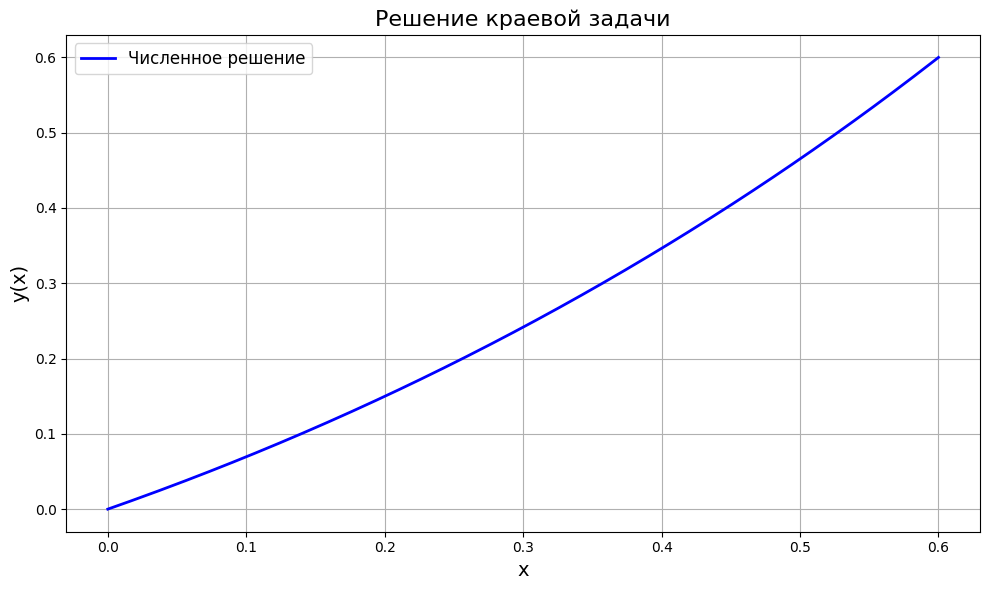

In [2]:
import numpy as np
import matplotlib.pyplot as plt

filename = "solution_output.txt"
data = np.loadtxt(filename)

x = data[:, 0]  
y = data[:, 1]  

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Численное решение", color="blue", linewidth=2)

plt.title("Решение краевой задачи", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("y(x)", fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()

plt.savefig("solution_plot.png") 
plt.show() 
